# Erdös-Rényi method for random graphs. For Julia
*by Roberto Esteban López*

In this work, an implementation of a python class and evaluation is done to test the Giant Component analysis on the random graphs generated with the method of Erdös-Rényi as proposed on their work [1]. In which, given a fixed number of vertex $n$ and a probility $p$ of including one of the ${n\choose 2}$ edges per vertex. The graphs are generated and stored in adjacency lists, then a function for a breadth-first search(BFS) which only result is the number of vertex reached by a random start BFS.

In [19]:
function get_random_graph(n::Int, p::Float64)
    G = []
    nodes = range(1,length=n)
    for node in nodes
        new_edges = []
        for i in nodes
           if i == node
               0 
            elseif p >= rand()
                push!(new_edges, i)
            end
        end
        push!(G, new_edges)
    end
    return G
end

function BFS(G)
    ls = length(G)
    s = 1
    discovered = zeros(Int8,ls)
    discovered[s] = 1
    L = [s]
    BFS_len = 1
    while L != []
       L_1 = []
        for u in L
           for v in G[u]
               if discovered[v] == 0
                    discovered[v] = 1
                    push!(L_1, v)
                    BFS_len += 1
                end
            end
        end
        L = L_1
    end
    return BFS_len
end

function convex_graph(n,p)
    G = get_random_graph(n, p)
    L_G = BFS(G)
    if n == L_G
        return 1
    else
        return 0
    end
end

convex_graph (generic function with 1 method)

Now, the results are generated with the previous code.

The test is done with different quantity of nodes for the graphs and the critical probabilities where the chances of having isolated nodes. Which comes from the following theorem [2]:

**Theorem:** Suppose $p = p_n = \log(n)/n + c/n$ where $c$ is an arbitary real constant. Then the number of isolated vertices of the random graph $G_{n,p}$ is governed asymptotically by a Poisson distribution with parameter $e^{-c}$. A fortiori, the probability that there exist isolated vertices in $G_{n,p}$ tends to $1-e^{e^{-c}}$ as $n \rightarrow \infty$.

In [30]:
iterations = 15
n_test = LinRange{Int}(10^2, 10^4, 3)
c_s = LinRange(-4, 6, 10)
p_test = Array{Float64}(undef, length(c_s),length(n_test))
results = copy(p_test)
for i in 1:length(c_s)
   for j in 1:length(n_test)
        n = n_test[j]
        c = c_s[i]
        p_test[i,j] = log(n) / n + c / n
    end
end


for i_n in 1:length(n_test)
    for i_c in 1:length(c_s)
        result = 0
        for _ in 1:iterations
            result += convex_graph(n_test[i_n],p_test[i_c,i_n])
        end
        results[i_c,i_n] = result / iterations
    end
end

The results shown in this notebook in constrast with the python implementation, Julia is quite effective to process all with a single thread in just about 5 min in a Intel i5 @ 3.9GHz. This comes at no surprise as seens the previous notebooks, usually Julia comes around 100 times faster than Python. Another remark, is that in here everything was computed with the same random seed, instead of generating a new one for each experiment as in Python.
The cost of this speed to the author comes in the lack of Class related objects on Julia, which takes many things from the Object oriented programming, but that is more a personal taste as everything could be programed with functions and the speed of julia can be worth it for big instances as this one.

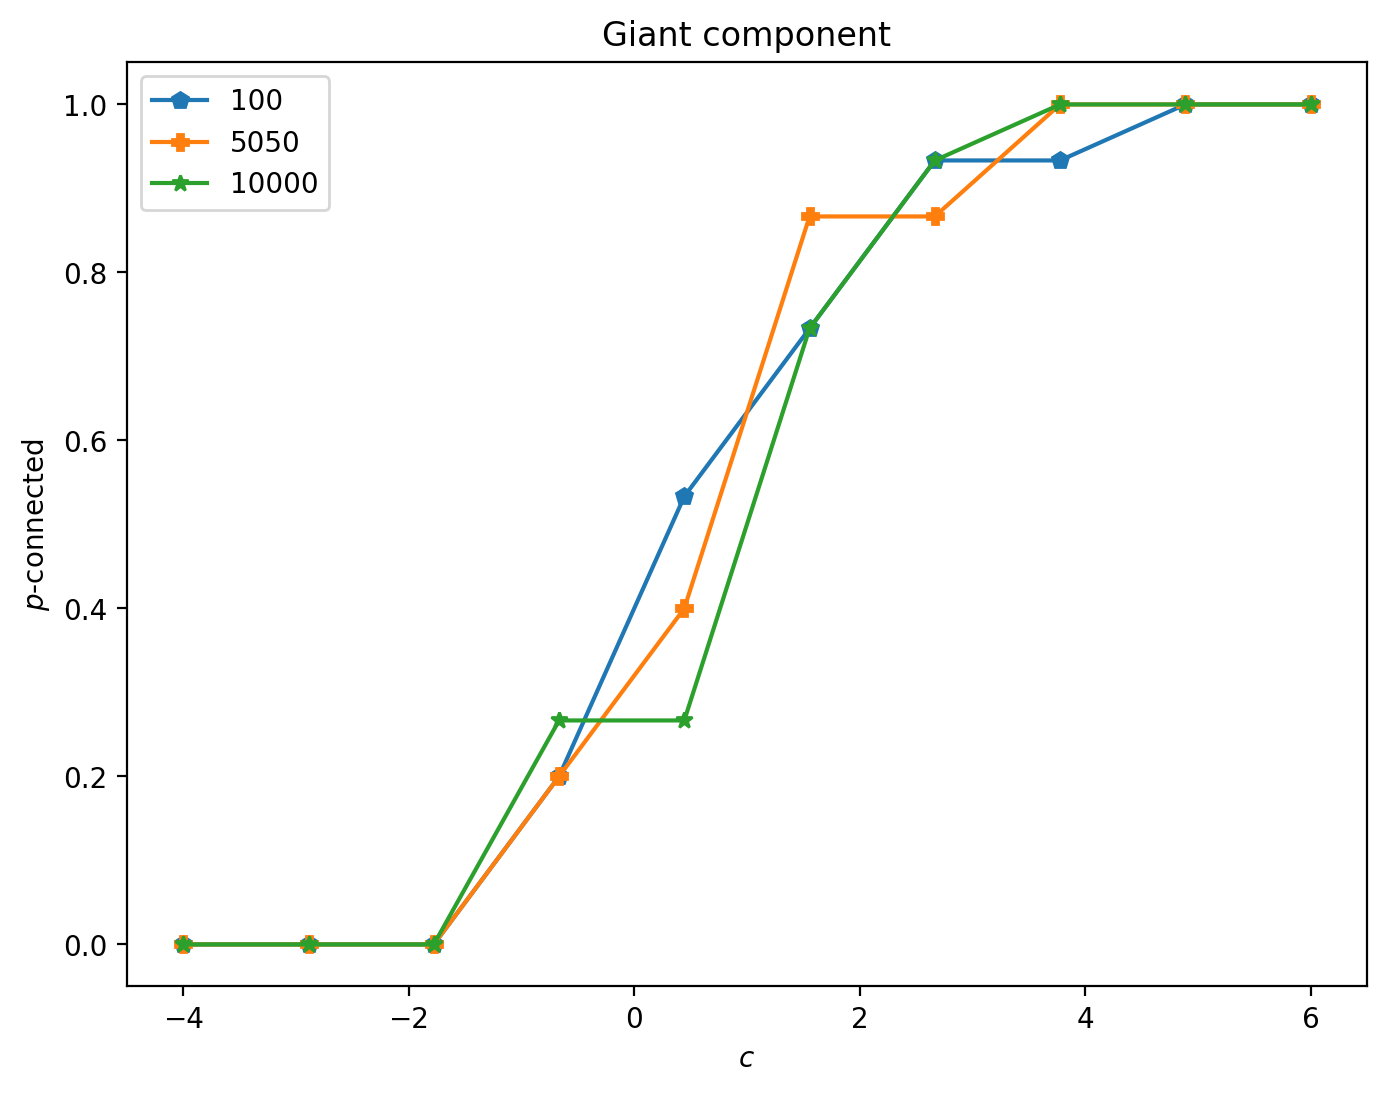

In [32]:
import PyPlot; const plt = PyPlot

fig = plt.figure(figsize=(8,6),dpi=200)
mar = ["p", "P", "*", "s"]
for i in 1:length(n_test)
    plt.plot(c_s, results[:,i],marker=mar[i], label=string(n_test[i]))
end
plt.xlabel("\$c\$")
plt.ylabel("\$p\$-connected")
plt.title("Giant component")
plt.legend()
plt.show()


As the graph shows, there is a notable jump on the probality or change of phase on with respect to $c$ even with multiple sizes of the random graphs. This following the behaviour of double expotential drop of probability $e^{-e^{-c}}$, which makes very unlikely to generate isolated vertex on the random graph once $c$ gets large enough. 

## References
- Erdős, P.; Rényi, A. (1959). "On Random Graphs. I". Publicationes Mathematicae. 6: 290–297
- Mitzenmacher, M., & Upfal, E. (2017). Probability and computing: Randomization and probabilistic techniques in algorithms and data analysis. Cambridge university press. 143